## 9. The Impact of Adding Dropout and Regularization

All the models in the previous notebooks achieve training accuracy from 90% to 95% and about 88% to 89 % for the accuracy of the validation dataset. This means the model can not apply very well what it learnt from the training dataset on the validation dataset. This scenario refers to the overfitting problem which can be solved by two stratgies: dropout and regularization.

In [1]:
import torch 
import torch.nn as nn 
from torch.utils.data import Dataset, DataLoader
from torch.optim import SGD, Adam
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
device = 'cuda' if torch.cuda.is_available() else 'cpu' 

In [2]:
from torchvision import datasets
data_folder = "Datasets"

In [3]:
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)
train_images = fmnist.data                                
train_targets = fmnist.targets

In [4]:
validation_fmnist = datasets.FashionMNIST(data_folder, download=True, train=False)
validation_images = validation_fmnist.data                                
validation_targets = validation_fmnist.targets 

### 9.1 Dropout

This stratgey randomly chooses a certian number of the hidden units in the hidden layers and switch them off (drop to 0) and in the next iteration another set of hidden units are choosen randomly and switched off. This technique is applied only in the training step.

In [10]:
def build_model(optimizer, lr):
    model = nn.Sequential(
        nn.Dropout(0.25), 
        nn.Linear(28*28, 1000), 
        nn.ReLU(),
        nn.Dropout(0.25),
        nn.Linear(1000,10)
    ).to(device)
    
    loss_function = nn.CrossEntropyLoss()
    optimizer = optimizer(model.parameters(), lr = lr)
    
    return model, loss_function, optimizer

In [11]:
from common_functions import get_data,train_with_validation,display_train_validation_results

In [12]:
train_data_loader, validation_data_loader = get_data(32,train_images,train_targets,validation_images,validation_targets)

In [13]:
model,loss_function, optimizer = build_model(optimizer = Adam , lr=1e-3)

In [14]:
train_losses, train_accuracies, validation_losses, validation_accuracies = train_with_validation(20, train_data_loader,
                                                                                                 validation_data_loader,
                                                                                                 model,
                                                                                                 loss_function,
                                                                                                 optimizer)

Epoch: 1
Train Loss: 0.540
Train Accuracy: 85%
Validation Loss: 0.450
Validation Accuracy: 84%
<--------------------------------------------------------->
Epoch: 2
Train Loss: 0.426
Train Accuracy: 86%
Validation Loss: 0.411
Validation Accuracy: 85%
<--------------------------------------------------------->
Epoch: 3
Train Loss: 0.395
Train Accuracy: 88%
Validation Loss: 0.363
Validation Accuracy: 87%
<--------------------------------------------------------->
Epoch: 4
Train Loss: 0.376
Train Accuracy: 87%
Validation Loss: 0.389
Validation Accuracy: 86%
<--------------------------------------------------------->
Epoch: 5
Train Loss: 0.361
Train Accuracy: 89%
Validation Loss: 0.353
Validation Accuracy: 87%
<--------------------------------------------------------->
Epoch: 6
Train Loss: 0.354
Train Accuracy: 89%
Validation Loss: 0.359
Validation Accuracy: 87%
<--------------------------------------------------------->
Epoch: 7
Train Loss: 0.345
Train Accuracy: 89%
Validation Loss: 0.341


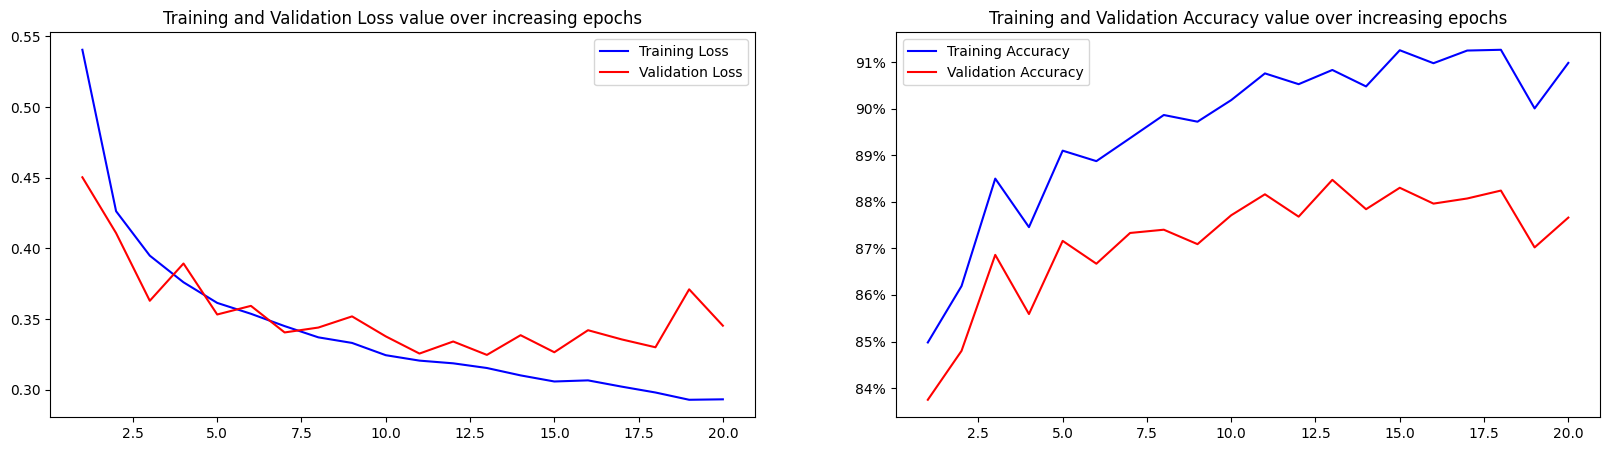

In [15]:
display_train_validation_results(20,train_losses, train_accuracies, validation_losses, validation_accuracies)

The delta between the training and validation datasets' accuracy is not as large as we saw in the previous models, thus resulting in a scenario that has less overfitting.

### 9.2 Regularization

Regularization is a dual objective function where it minimizes the loss value of the training data as well as prevent the weights from having high values, which in turn, reduce the overfitting.